# AGENTISSUE-BENCH - Visualization




## Bước 1: Import lib



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

output_dir = "output/images"   
os.makedirs(output_dir, exist_ok=True)

print("Đã tạo thư mục:", os.path.abspath(output_dir))
print("Đã import thành công các thư viện!")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {plt.matplotlib.__version__}")


Đã tạo thư mục: /Users/tranvanhuy/Desktop/Research/output/images
Đã import thành công các thư viện!
pandas version: 2.1.4
matplotlib version: 3.10.7


## Bước 2: Load dữ liệu từ các file CSV


In [8]:
# Load 4 file CSV
df_summary = pd.read_csv('benchmark_results_summary.csv')
df_per_issue = pd.read_csv('benchmark_results_per_issue.csv')
df_comparison = pd.read_csv('benchmark_agent_comparison.csv')
df_unresolved = pd.read_csv('benchmark_unresolved_issues.csv')

print("Đã load thành công 4 file CSV!")
print(f"\n- Summary: {df_summary.shape[0]} rows x {df_summary.shape[1]} columns")
print(f"- Per Issue: {df_per_issue.shape[0]} rows x {df_per_issue.shape[1]} columns")
print(f"- Comparison: {df_comparison.shape[0]} rows x {df_comparison.shape[1]} columns")
print(f"- Unresolved: {df_unresolved.shape[0]} rows x {df_unresolved.shape[1]} columns")


print(df_summary.columns.tolist())

df_summary



Đã load thành công 4 file CSV!

- Summary: 6 rows x 11 columns
- Per Issue: 50 rows x 11 columns
- Comparison: 3 rows x 8 columns
- Unresolved: 50 rows x 10 columns
=== BENCHMARK RESULTS SUMMARY ===
['Agent', 'LLM', 'Coverage_Rate_%', 'Issues_With_Patches', 'Total_Issues', 'Total_Patches_Generated', 'Avg_Patches_Per_Issue', 'Paper_Plausible_%', 'Paper_Correct_%', 'Paper_File_Localization_%', 'Paper_Function_Localization_%']


,Agent,LLM,Coverage_Rate_%,Issues_With_Patches,Total_Issues,Total_Patches_Generated,Avg_Patches_Per_Issue,Paper_Plausible_%,Paper_Correct_%,Paper_File_Localization_%,Paper_Function_Localization_%
0,Agentless,GPT-4o,78.0,39,50,107,2.74,12.00,3.33,27.82,12.99
1,Agentless,Claude-3.5-S,82.0,41,50,123,3.00,12.00,4.00,27.35,17.50
2,AutoCodeRover,GPT-4o,68.0,34,50,99,2.91,7.33,1.33,22.07,14.77
3,AutoCodeRover,Claude-3.5-S,62.0,31,50,81,2.61,12.67,4.67,25.81,19.18
4,SWE-agent,GPT-4o,88.0,44,50,130,2.95,0.67,0.67,11.67,4.22
5,SWE-agent,Claude-3.5-S,78.0,39,50,114,2.92,2.00,2.00,9.52,6.78


## Bước 3: data Summary


In [ ]:
print("=== THỐNG KÊ CƠ BẢN ===")
print("\nTổng số patches được generate:")
print(df_summary['Total_Patches_Generated'].sum())

print("\nCoverage Rate trung bình:")
print(f"{df_summary['Coverage_Rate_%'].astype(float).mean():.2f}%")

print("\nCorrect Resolution Rate từ paper:")
print(f"Min: {df_summary['Paper_Correct_%'].astype(float).min():.2f}%")
print(f"Max: {df_summary['Paper_Correct_%'].astype(float).max():.2f}%")
print(f"Mean: {df_summary['Paper_Correct_%'].astype(float).mean():.2f}%")


## Bước 4: Visualization #1 - Coverage Rate so sánh giữa các Agents


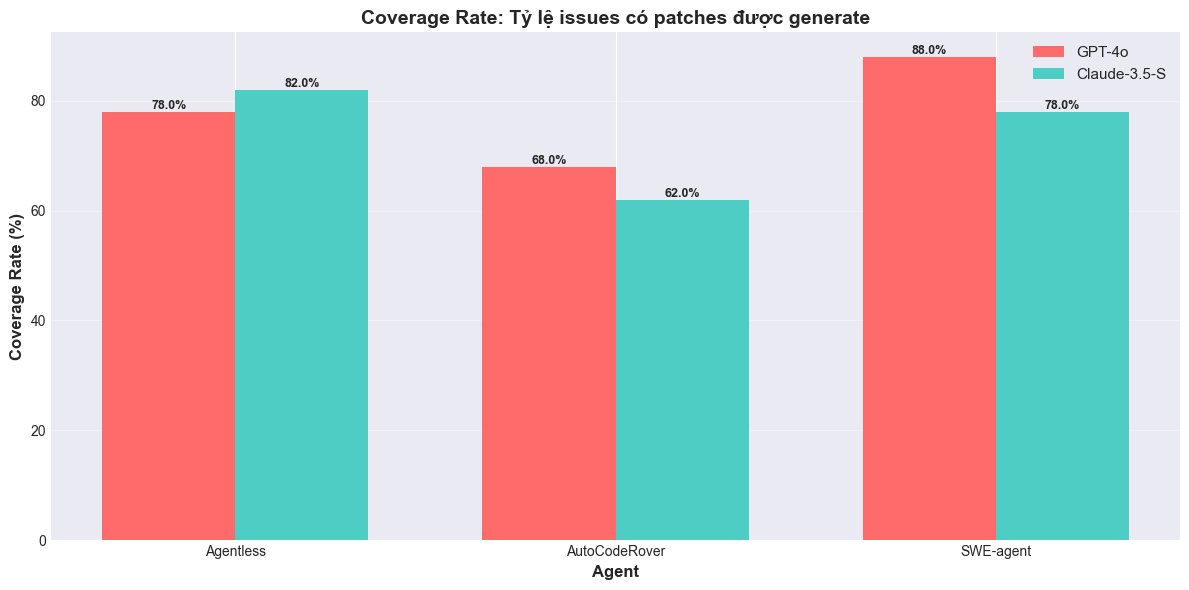

Biểu đồ Coverage Rate đã được tạo!


In [9]:
# Chuẩn bị dữ liệu
fig, ax = plt.subplots(figsize=(12, 6))

agents = df_summary['Agent'].unique()
llms = df_summary['LLM'].unique()
x = np.arange(len(agents))
width = 0.35

# Data cho từng LLM
gpt_coverage = []
claude_coverage = []

for agent in agents:
    gpt_val = df_summary[(df_summary['Agent'] == agent) & (df_summary['LLM'] == 'GPT-4o')]['Coverage_Rate_%'].values[0]
    claude_val = df_summary[(df_summary['Agent'] == agent) & (df_summary['LLM'] == 'Claude-3.5-S')]['Coverage_Rate_%'].values[0]
    gpt_coverage.append(float(gpt_val))
    claude_coverage.append(float(claude_val))

# Vẽ biểu đồ
bars1 = ax.bar(x - width/2, gpt_coverage, width, label='GPT-4o', color='#FF6B6B')
bars2 = ax.bar(x + width/2, claude_coverage, width, label='Claude-3.5-S', color='#4ECDC4')

# Thêm labels và title
ax.set_xlabel('Agent', fontsize=12, fontweight='bold')
ax.set_ylabel('Coverage Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Coverage Rate: Tỷ lệ issues có patches được generate', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(agents)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Thêm giá trị trên mỗi cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('AgentIssue-Bench/output/images/coverage_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Biểu đồ Coverage Rate đã được tạo!")


## Bước 5: Visualization #2 - Resolution Rate từ Paper


In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Data cho Resolution Rate
gpt_resolution = []
claude_resolution = []

for agent in agents:
    gpt_val = df_summary[(df_summary['Agent'] == agent) & (df_summary['LLM'] == 'GPT-4o')]['Paper_Correct_%'].values[0]
    claude_val = df_summary[(df_summary['Agent'] == agent) & (df_summary['LLM'] == 'Claude-3.5-S')]['Paper_Correct_%'].values[0]
    gpt_resolution.append(float(gpt_val))
    claude_resolution.append(float(claude_val))

# Vẽ biểu đồ
bars1 = ax.bar(x - width/2, gpt_resolution, width, label='GPT-4o', color='#FF6B6B')
bars2 = ax.bar(x + width/2, claude_resolution, width, label='Claude-3.5-S', color='#4ECDC4')

# Thêm labels và title
ax.set_xlabel('Agent', fontsize=12, fontweight='bold')
ax.set_ylabel('Correct Resolution Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Resolution Rate: Tỷ lệ issues được fix đúng (từ Paper)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(agents)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 5.5)

# Thêm giá trị trên mỗi cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('AgentIssue-Bench/output/images/resolution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Biểu đồ Resolution Rate đã được tạo!")


## Bước 6: Visualization #3 - THE QUALITY GAP (Quan trọng nhất!)


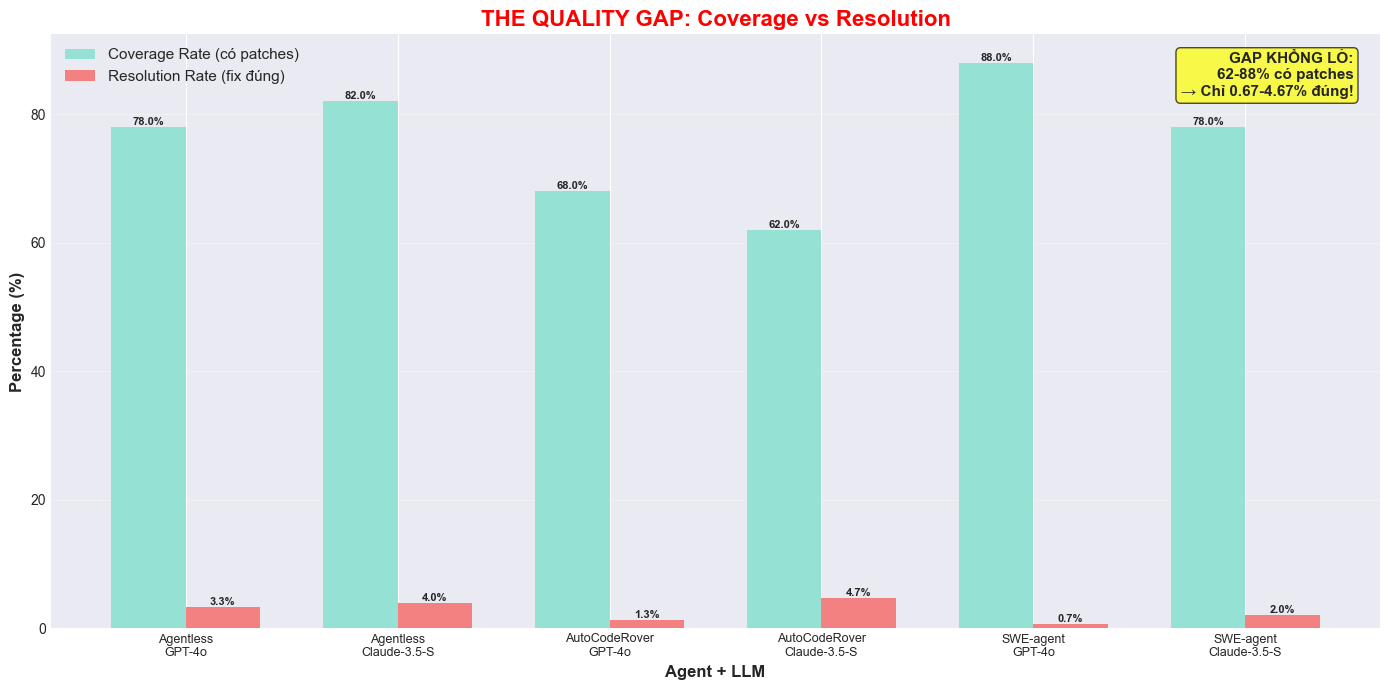

Biểu đồ Quality Gap đã được tạo!


In [10]:
fig, ax = plt.subplots(figsize=(14, 7))

# Tạo data cho comparison
agent_llm_labels = []
coverage_vals = []
resolution_vals = []

for _, row in df_summary.iterrows():
    agent_llm_labels.append(f"{row['Agent']}\n{row['LLM']}")
    coverage_vals.append(float(row['Coverage_Rate_%']))
    resolution_vals.append(float(row['Paper_Correct_%']))

x_pos = np.arange(len(agent_llm_labels))
width = 0.35

# Vẽ biểu đồ
bars1 = ax.bar(x_pos - width/2, coverage_vals, width, label='Coverage Rate (có patches)', color='#95E1D3')
bars2 = ax.bar(x_pos + width/2, resolution_vals, width, label='Resolution Rate (fix đúng)', color='#F38181')

# Thêm labels và title
ax.set_xlabel('Agent + LLM', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('THE QUALITY GAP: Coverage vs Resolution', fontsize=16, fontweight='bold', color='red')
ax.set_xticks(x_pos)
ax.set_xticklabels(agent_llm_labels, fontsize=9)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Thêm giá trị
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# Thêm text box với insight
textstr = 'GAP KHỔNG LỒ:\n62-88% có patches\n→ Chỉ 0.67-4.67% đúng!'
props = dict(boxstyle='round', facecolor='yellow', alpha=0.7)
ax.text(0.98, 0.97, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right', bbox=props, fontweight='bold')

plt.tight_layout()
plt.savefig('AgentIssue-Bench/output/images/quality_gap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Biểu đồ Quality Gap đã được tạo!")


## Bước 7: Khám phá dữ liệu Per-Issue


In [11]:
print("=== DỮ LIỆU CHI TIẾT TỪNG ISSUE ===")
print(f"\nTổng số issues: {len(df_per_issue)}")
print(f"\n5 issues đầu tiên:")
df_per_issue.head()


=== DỮ LIỆU CHI TIẾT TỪNG ISSUE ===

Tổng số issues: 50

5 issues đầu tiên:


,Issue_Tag,Repository,Agentless_GPT-4o_Patches,Agentless_Claude_Patches,AutoCodeRover_GPT-4o_Patches,AutoCodeRover_Claude_Patches,SWE-agent_GPT-4o_Patches,SWE-agent_Claude_Patches,Total_Patches,Any_Agent_Attempted,All_Agents_Failed
0,agixt_1026,agixt,3,3,3,3,3,3,18,Yes,No
1,crewai_1370,crewai,3,3,0,3,3,3,15,Yes,No
2,agixt_1030,agixt,3,3,3,3,3,2,17,Yes,No
3,crewai_1463,crewai,3,3,0,3,3,3,15,Yes,No
4,agixt_1253,agixt,3,3,3,3,2,0,14,Yes,No


In [12]:
# Thống kê về patches per issue
print("=== THỐNG KÊ PATCHES PER ISSUE ===")
print(f"\nTổng patches trên tất cả issues: {df_per_issue['Total_Patches'].sum()}")
print(f"Trung bình patches per issue: {df_per_issue['Total_Patches'].mean():.2f}")
print(f"Max patches cho 1 issue: {df_per_issue['Total_Patches'].max()}")
print(f"Min patches cho 1 issue: {df_per_issue['Total_Patches'].min()}")

# Issues không có patches
no_patches = df_per_issue[df_per_issue['Total_Patches'] == 0]
print(f"\nSố issues KHÔNG CÓ PATCHES: {len(no_patches)}")
if len(no_patches) > 0:
    print("Danh sách:")
    for idx, row in no_patches.iterrows():
        print(f"  - {row['Issue_Tag']} (Repository: {row['Repository']})")


=== THỐNG KÊ PATCHES PER ISSUE ===

Tổng patches trên tất cả issues: 654
Trung bình patches per issue: 13.08
Max patches cho 1 issue: 18
Min patches cho 1 issue: 0

Số issues KHÔNG CÓ PATCHES: 2
Danh sách:
  - ai_4619 (Repository: ai)
  - ai_6510 (Repository: ai)


## Bước 8: Visualization #4 - Distribution của patches


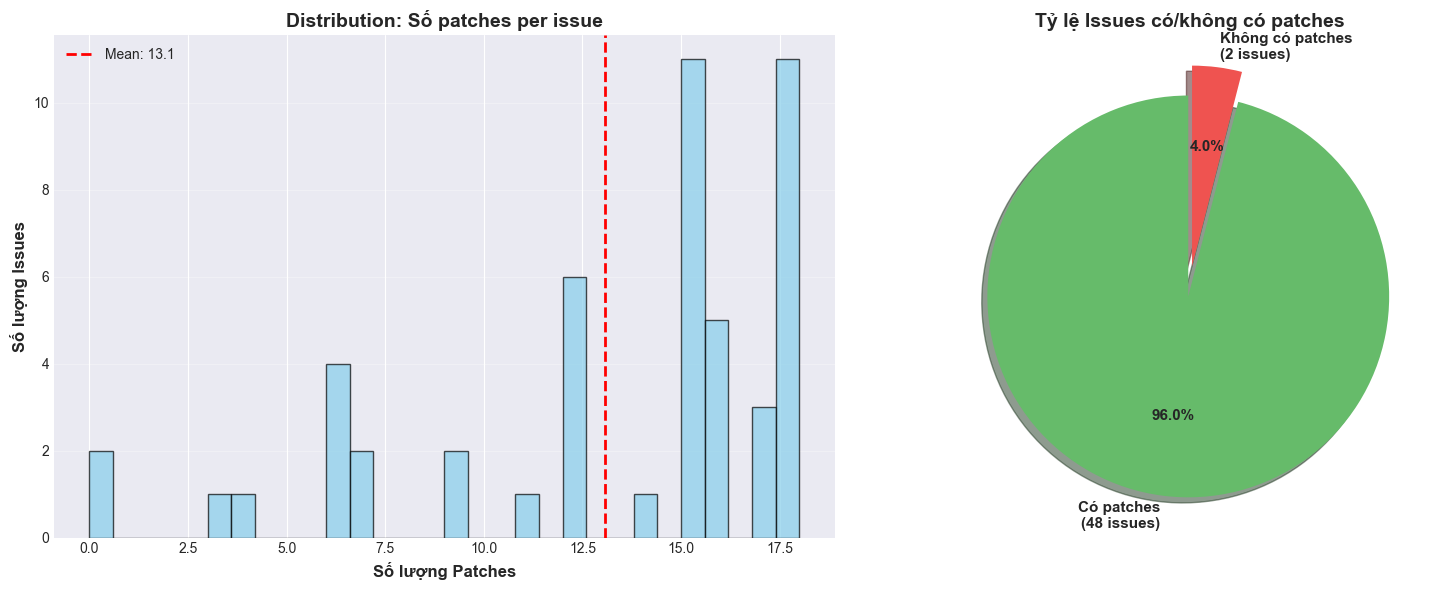

Biểu đồ Distribution đã được tạo!


In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram: Distribution of total patches
ax1.hist(df_per_issue['Total_Patches'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Số lượng Patches', fontsize=12, fontweight='bold')
ax1.set_ylabel('Số lượng Issues', fontsize=12, fontweight='bold')
ax1.set_title('Distribution: Số patches per issue', fontsize=14, fontweight='bold')
ax1.axvline(df_per_issue['Total_Patches'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_per_issue['Total_Patches'].mean():.1f}")
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Pie chart: Issues với/không có patches
has_patches = (df_per_issue['Total_Patches'] > 0).sum()
no_patches_count = (df_per_issue['Total_Patches'] == 0).sum()

sizes = [has_patches, no_patches_count]
labels = [f'Có patches\n({has_patches} issues)', f'Không có patches\n({no_patches_count} issues)']
colors = ['#66BB6A', '#EF5350']
explode = (0.05, 0.1)

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Tỷ lệ Issues có/không có patches', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('AgentIssue-Bench/output/images/patches_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Biểu đồ Distribution đã được tạo!")


## Bước 9: Visualization #5 - Top repositories


In [14]:
# Đếm số issues per repository
repo_counts = df_per_issue['Repository'].value_counts()

print("=== REPOSITORIES TRONG BENCHMARK ===")
print(f"\nTổng số repositories: {len(repo_counts)}")
print("\nTop 10 repositories có nhiều issues nhất:")
print(repo_counts.head(10))


=== REPOSITORIES TRONG BENCHMARK ===

Tổng số repositories: 15

Top 10 repositories có nhiều issues nhất:
Repository
crewai      9
autogen     8
agixt       6
evoninja    5
ai          4
camel       4
lagent      3
chatdev     3
haystack    2
metagpt     1
Name: count, dtype: int64


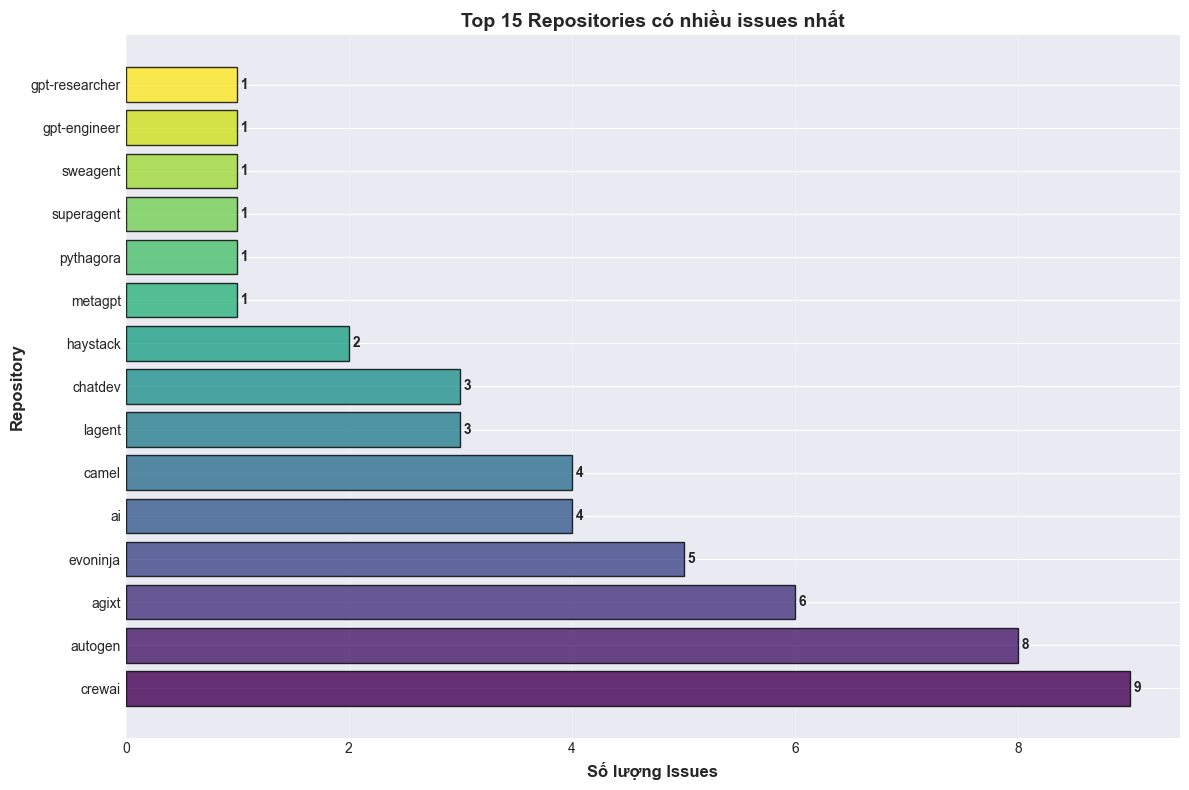

Biểu đồ Top Repositories đã được tạo!


In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

# Lấy top 15 repositories
top_repos = repo_counts.head(15)

# Vẽ horizontal bar chart
colors_repo = plt.cm.viridis(np.linspace(0, 1, len(top_repos)))
bars = ax.barh(range(len(top_repos)), top_repos.values, color=colors_repo, edgecolor='black', alpha=0.8)

ax.set_yticks(range(len(top_repos)))
ax.set_yticklabels(top_repos.index)
ax.set_xlabel('Số lượng Issues', fontsize=12, fontweight='bold')
ax.set_ylabel('Repository', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Repositories có nhiều issues nhất', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Thêm giá trị
for i, (bar, value) in enumerate(zip(bars, top_repos.values)):
    ax.text(value, i, f' {value}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('AgentIssue-Bench/output/images/top_repositories.png', dpi=300, bbox_inches='tight')
plt.show()

print("Biểu đồ Top Repositories đã được tạo!")


## Bước 10: Visualization #6 - Heatmap patches per agent


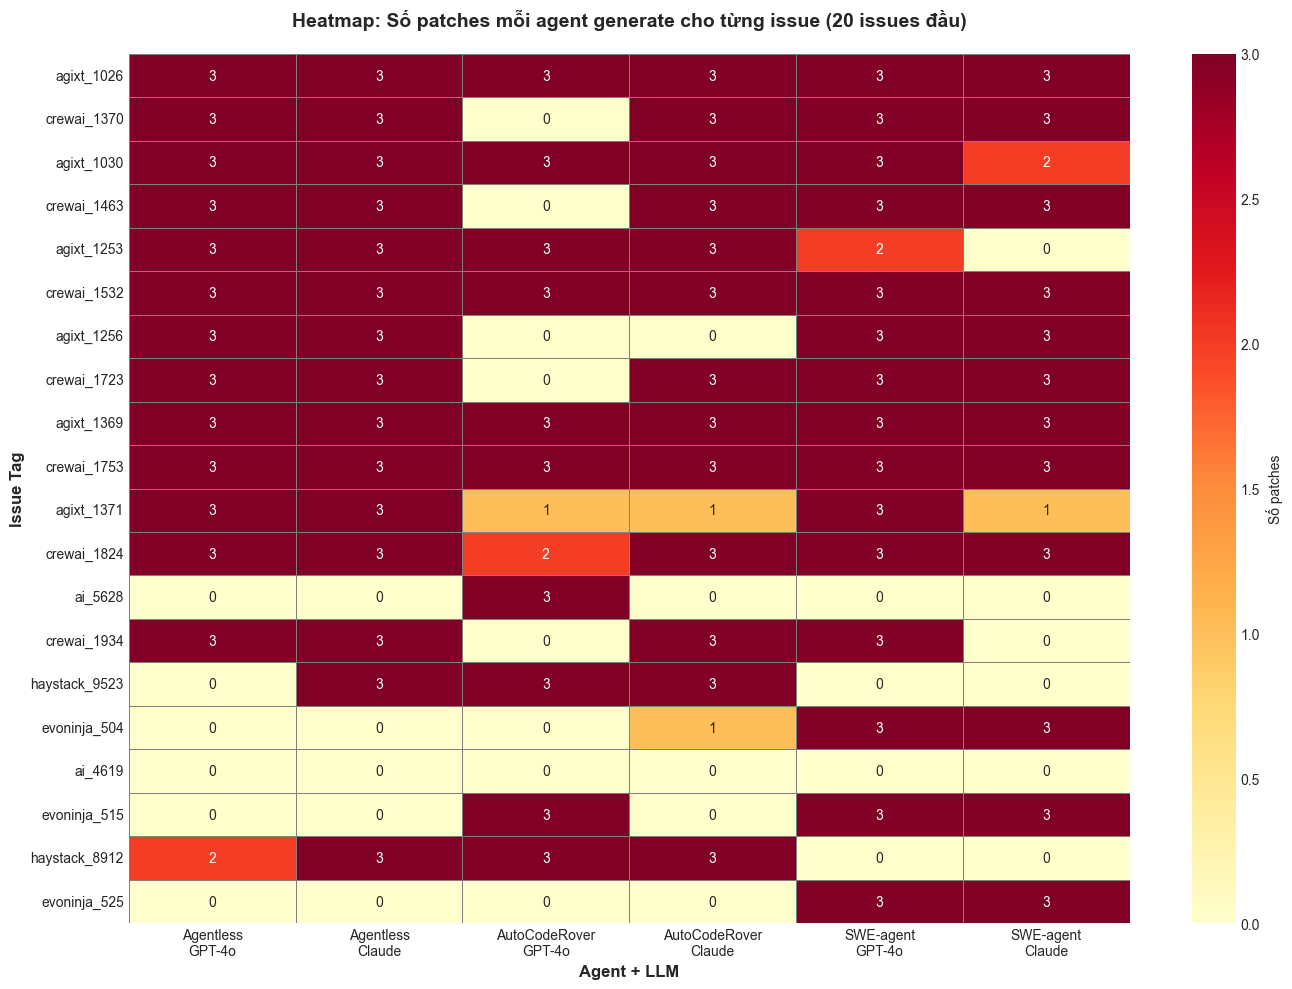

Biểu đồ Heatmap đã được tạo!


In [16]:
# Chuẩn bị data cho heatmap - lấy 20 issues đầu
patch_columns = [col for col in df_per_issue.columns if 'Patches' in col and col != 'Total_Patches']
heatmap_data = df_per_issue[['Issue_Tag'] + patch_columns].head(20)
heatmap_data = heatmap_data.set_index('Issue_Tag')

# Rút gọn tên cột
heatmap_data.columns = [col.replace('_Patches', '').replace('_', '\n') for col in heatmap_data.columns]

fig, ax = plt.subplots(figsize=(14, 10))

# Vẽ heatmap
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Số patches'},
            linewidths=0.5, linecolor='gray', ax=ax)

ax.set_title('Heatmap: Số patches mỗi agent generate cho từng issue (20 issues đầu)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Agent + LLM', fontsize=12, fontweight='bold')
ax.set_ylabel('Issue Tag', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('AgentIssue-Bench/output/images/patches_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Biểu đồ Heatmap đã được tạo!")


## Bước 11: Phân tích Unresolved Issues


In [17]:
print("=== UNRESOLVED ISSUES ANALYSIS ===")
print(f"\n5 issues đầu:")
df_unresolved.head()


=== UNRESOLVED ISSUES ANALYSIS ===

5 issues đầu:


,Issue_Tag,Repository,Agentless_GPT,Agentless_Claude,ACR_GPT,ACR_Claude,SWE_GPT,SWE_Claude,Total_Attempts,Status
0,agixt_1026,agixt,3,3,3,3,3,3,18,Well Attempted
1,crewai_1370,crewai,3,3,0,3,3,3,15,Well Attempted
2,agixt_1030,agixt,3,3,3,3,3,2,17,Well Attempted
3,crewai_1463,crewai,3,3,0,3,3,3,15,Well Attempted
4,agixt_1253,agixt,3,3,3,3,2,0,14,Well Attempted


In [18]:
# Phân tích theo Status
status_counts = df_unresolved['Status'].value_counts()

print("=== PHÂN LOẠI THEO STATUS ===")
for status, count in status_counts.items():
    print(f"{status}: {count} issues ({count/len(df_unresolved)*100:.1f}%)")

# Issues hoàn toàn không có patches
completely_unresolved = df_unresolved[df_unresolved['Status'] == 'Completely Unresolved']
print(f"\n=== {len(completely_unresolved)} ISSUES HOÀN TOÀN KHÔNG GIẢI QUYẾT ĐƯỢC ===")
for idx, row in completely_unresolved.iterrows():
    print(f"- {row['Issue_Tag']} (Repository: {row['Repository']})")


=== PHÂN LOẠI THEO STATUS ===
Well Attempted: 38 issues (76.0%)
Partially Resolved: 10 issues (20.0%)
Completely Unresolved: 2 issues (4.0%)

=== 2 ISSUES HOÀN TOÀN KHÔNG GIẢI QUYẾT ĐƯỢC ===
- ai_4619 (Repository: ai)
- ai_6510 (Repository: ai)


## Bước 12: Visualization #7 - Status distribution & Attempts


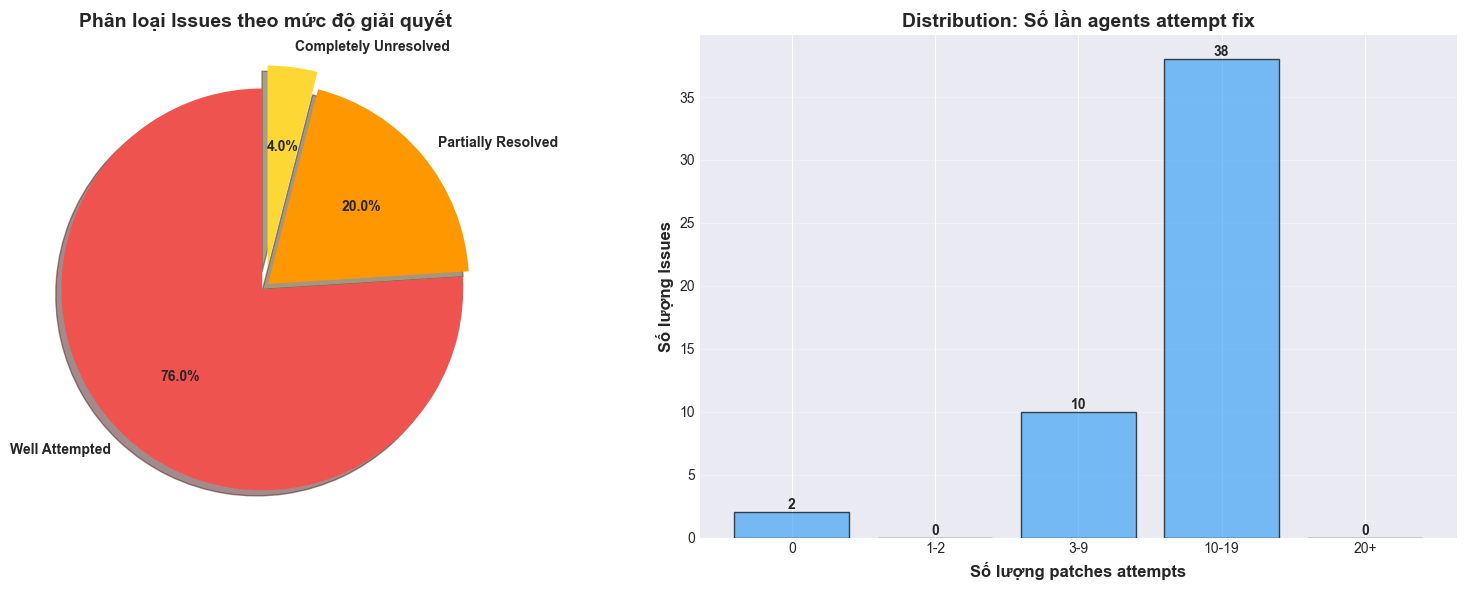

Biểu đồ Unresolved Analysis đã được tạo!


In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart - Status distribution
colors_status = ['#EF5350', '#FF9800', '#FDD835', '#66BB6A']
explode_vals = tuple([0.1 if status == 'Completely Unresolved' else 0.02 for status in status_counts.index])

wedges, texts, autotexts = ax1.pie(status_counts.values, labels=status_counts.index, 
                                     colors=colors_status, autopct='%1.1f%%',
                                     explode=explode_vals, shadow=True, startangle=90,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})

ax1.set_title('Phân loại Issues theo mức độ giải quyết', fontsize=14, fontweight='bold')

# Bar chart - Total attempts distribution
attempt_ranges = ['0', '1-2', '3-9', '10-19', '20+']
attempt_counts = [
    len(df_unresolved[df_unresolved['Total_Attempts'] == 0]),
    len(df_unresolved[(df_unresolved['Total_Attempts'] >= 1) & (df_unresolved['Total_Attempts'] <= 2)]),
    len(df_unresolved[(df_unresolved['Total_Attempts'] >= 3) & (df_unresolved['Total_Attempts'] <= 9)]),
    len(df_unresolved[(df_unresolved['Total_Attempts'] >= 10) & (df_unresolved['Total_Attempts'] <= 19)]),
    len(df_unresolved[df_unresolved['Total_Attempts'] >= 20])
]

bars = ax2.bar(attempt_ranges, attempt_counts, color='#42A5F5', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Số lượng patches attempts', fontsize=12, fontweight='bold')
ax2.set_ylabel('Số lượng Issues', fontsize=12, fontweight='bold')
ax2.set_title('Distribution: Số lần agents attempt fix', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Thêm giá trị
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('AgentIssue-Bench/output/images/unresolved_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Biểu đồ Unresolved Analysis đã được tạo!")


## Bước 13: TỔNG KẾT - Summary Report


In [23]:
print("="*70)
print("TỔNG KẾT KẾT QUẢ PHÂN TÍCH VÀ VISUALIZATION")
print("="*70)

print("\n=== DỮ LIỆU ĐÃ PHÂN TÍCH ===")
print(f"- Tổng số issues: 50")
print(f"- Tổng số patches: {df_per_issue['Total_Patches'].sum()}")
print(f"- Số agents: 3 (Agentless, AutoCodeRover, SWE-agent)")
print(f"- Số LLMs: 2 (GPT-4o, Claude-3.5-S)")

print("\n=== KEY FINDINGS ===")
print(f"\n1. COVERAGE RATE (Agents tạo patches):")
print(f"   - Trung bình: {df_summary['Coverage_Rate_%'].astype(float).mean():.2f}%")
print(f"   - Cao nhất: SWE-agent + GPT-4o (88.00%)")
print(f"   - Thấp nhất: AutoCodeRover + Claude (62.00%)")

print(f"\n2. RESOLUTION RATE (Patches đúng - từ paper):")
print(f"   - Trung bình: {df_summary['Paper_Correct_%'].astype(float).mean():.2f}%")
print(f"   - Cao nhất: AutoCodeRover + Claude (4.67%)")
print(f"   - Thấp nhất: SWE-agent + GPT-4o (0.67%)")

print(f"\n3. THE QUALITY GAP:")
print(f"   - Coverage: 62-88% (agents attempt fix)")
print(f"   - Resolution: 0.67-4.67% (actually correct)")
print(f"   - Gap: ~60-87 percentage points!")
print(f"   - Success rate: {df_per_issue['Total_Patches'].sum()} patches → ~2-3 correct (0.31%)")

gpt_avg_resolution = df_summary[df_summary['LLM'] == 'GPT-4o']['Paper_Correct_%'].astype(float).mean()
claude_avg_resolution = df_summary[df_summary['LLM'] == 'Claude-3.5-S']['Paper_Correct_%'].astype(float).mean()

print(f"\n4. LLM COMPARISON:")
print(f"   - Claude-3.5-S: {claude_avg_resolution:.2f}% avg resolution")
print(f"   - GPT-4o: {gpt_avg_resolution:.2f}% avg resolution")
print(f"   - Winner: Claude-3.5-S (consistently better)")

print(f"\n5. UNRESOLVED ISSUES:")
print(f"   - Hoàn toàn không có patches: {len(completely_unresolved)} issues")
for idx, row in completely_unresolved.iterrows():
    print(f"     • {row['Issue_Tag']}")

print("\n=== BIỂU ĐỒ ĐÃ TẠO ===")
visualizations = [
    "1. coverage_comparison.png - So sánh Coverage Rate",
    "2. resolution_comparison.png - So sánh Resolution Rate",
    "3. quality_gap.png - The Quality Gap",
    "4. patches_distribution.png - Distribution của patches",
    "5. top_repositories.png - Top repositories",
    "6. patches_heatmap.png - Heatmap patches per agent",
    "7. unresolved_analysis.png - Phân tích unresolved issues"
]

for viz in visualizations:
    print(f"   {viz}")

print("\n" + "="*70)
print("TẤT CẢ BIỂU ĐỒ ĐÃ ĐƯỢC LƯU VÀO:")
print("output/images/")
print("="*70)


TỔNG KẾT KẾT QUẢ PHÂN TÍCH VÀ VISUALIZATION

=== DỮ LIỆU ĐÃ PHÂN TÍCH ===
- Tổng số issues: 50
- Tổng số patches: 654
- Số agents: 3 (Agentless, AutoCodeRover, SWE-agent)
- Số LLMs: 2 (GPT-4o, Claude-3.5-S)

=== KEY FINDINGS ===

1. COVERAGE RATE (Agents tạo patches):
   - Trung bình: 76.00%
   - Cao nhất: SWE-agent + GPT-4o (88.00%)
   - Thấp nhất: AutoCodeRover + Claude (62.00%)

2. RESOLUTION RATE (Patches đúng - từ paper):
   - Trung bình: 2.67%
   - Cao nhất: AutoCodeRover + Claude (4.67%)
   - Thấp nhất: SWE-agent + GPT-4o (0.67%)

3. THE QUALITY GAP:
   - Coverage: 62-88% (agents attempt fix)
   - Resolution: 0.67-4.67% (actually correct)
   - Gap: ~60-87 percentage points!
   - Success rate: 654 patches → ~2-3 correct (0.31%)

4. LLM COMPARISON:
   - Claude-3.5-S: 3.56% avg resolution
   - GPT-4o: 1.78% avg resolution
   - Winner: Claude-3.5-S (consistently better)

5. UNRESOLVED ISSUES:
   - Hoàn toàn không có patches: 2 issues
     • ai_4619
     • ai_6510

=== BIỂU ĐỒ ĐÃ TẠO